In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.axislines import AxesZero
from matplotlib.colors import LinearSegmentedColormap


In [2]:
M = 0.725
N = 100
b = [M] * 0 * N + list(np.linspace(M, 0, N)) + [0] * N * 2
g = [M] * 1 * N + list(np.linspace(M, 0, N)) + [0] * N * 1
r = [M] * 2 * N + list(np.linspace(M, 0, N)) + [0] * N * 0
hot_grey = LinearSegmentedColormap.from_list(name='hot_grey',colors=np.array([r,g,b]).T)

In [3]:
x = np.linspace(-2,2, 100)
bx = np.linspace(-2,2, 20)
y = np.linspace(-2,2, 100)
by = np.linspace(-2,2, 20)
X, Y = np.meshgrid(x, y)
BX, BY = np.meshgrid(bx, by)

def dist2(x, y, x0=0, y0=0):
    return (x-x0)**2 + (y-y0)**2
def bump(x, y, x0=0, y0=0, c=1):
    return np.exp(-c*dist2(x, y, x0, y0))
def flu(x, y):
    return 1.25 * bump(x, y, -0.6, 0.25, 3) + bump(x, y, 0.6, -0.25, 4)

Z = flu(X, Y)
B = flu(BX, BY)

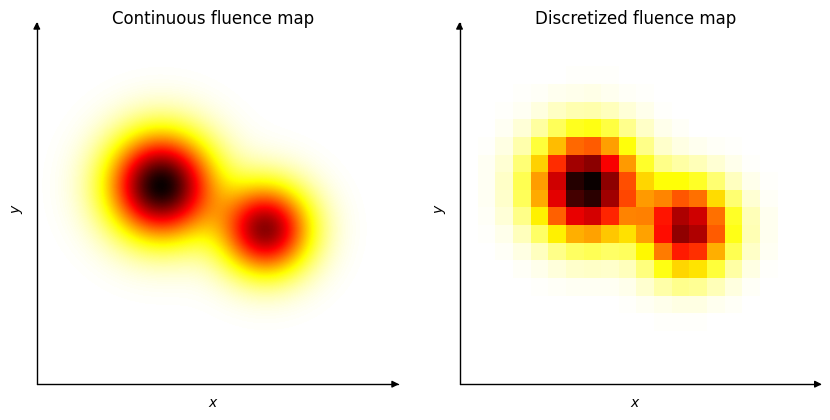

In [4]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1, axes_class=AxesZero)
plt.imshow(Z[::-1], cmap='hot_r', interpolation='bilinear', extent=(-2,2,-2,2))
plt.xticks([])
plt.yticks([])
plt.ylabel('$y$')
plt.xlabel('$x$')
plt.gca().axis["left"].set_axisline_style("-|>")
plt.gca().axis["bottom"].set_axisline_style("-|>")
plt.gca().axis["top"].set_visible(False)
plt.gca().axis["right"].set_visible(False)
plt.title('Continuous fluence map')

plt.subplot(1, 2, 2, axes_class=AxesZero)
plt.imshow(B[::-1], cmap='hot_r', interpolation='none', extent=(-2,2,-2,2))
plt.xticks([])
plt.yticks([])
plt.ylabel('$y$')
plt.xlabel('$x$')
plt.gca().axis["left"].set_axisline_style("-|>")
plt.gca().axis["bottom"].set_axisline_style("-|>")
plt.gca().axis["top"].set_visible(False)
plt.gca().axis["right"].set_visible(False)
plt.title('Discretized fluence map')

plt.savefig('fluence_discretization_plot2D.pdf', bbox_inches='tight')
plt.show()

In [5]:
def get_color(val):
    return plt.get_cmap('hot_r')(val/Z.max())
def get_color_alpha(val):
    r,g,b,a = get_color(val)
    return (r,g,b, 0.1)

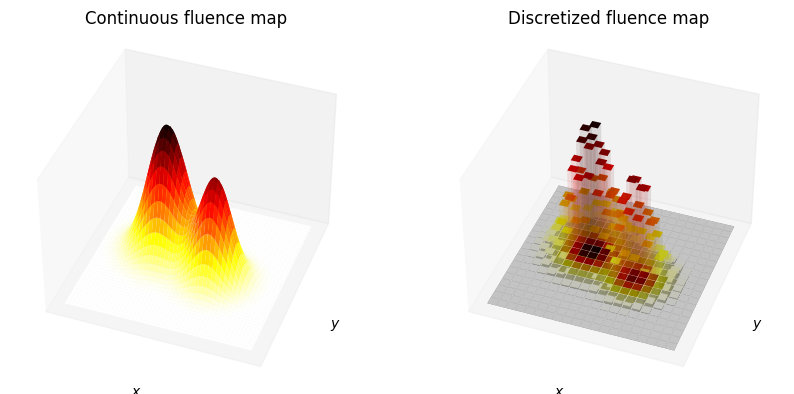

In [6]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1,2,1, projection='3d')
ax.plot_surface(X, Y, Z, cmap='hot_r')
ax.xaxis.line.set_color((0.0, 0.0, 0.0, 0.0))
ax.set_xticks([])
ax.set_xlabel('$x$')
ax.yaxis.line.set_color((0.0, 0.0, 0.0, 0.0))
ax.set_yticks([])
ax.set_ylabel('$y$')
ax.set_zlabel('') # ('fluence')
ax.zaxis.line.set_color((0.0, 0.0, 0.0, 0.0))
ax.set_zticks([])
ax.view_init(40, 290)
plt.title('Continuous fluence map')

ax = fig.add_subplot(1,2,2, projection='3d')
for i in range(B.shape[0]):
    for j in range(B.shape[1]):
        t = (0,0,0,0)
        c = get_color(B[i,j])
        ca = get_color_alpha(B[i,j])
        cs = (c,c,ca,t,t,ca) # (-Z, +Z, -Y, +Y, -X, +X)
        ax.bar3d(BX[i,j], BY[i,j], 0, 4/len(BX), 4/len(BX[0]), B[i,j], color=cs)
ax.xaxis.line.set_color((0.0, 0.0, 0.0, 0.0))
ax.set_xticks([])
ax.set_xlabel('$x$')
ax.yaxis.line.set_color((0.0, 0.0, 0.0, 0.0))
ax.set_yticks([])
ax.set_ylabel('$y$')
ax.set_zlabel('') # ('fluence')
ax.zaxis.line.set_color((0.0, 0.0, 0.0, 0.0))
ax.set_zticks([])
ax.view_init(40, 290)
plt.title('Discretized fluence map')

plt.savefig('fluence_discretization_plot3D.pdf', bbox_inches='tight')
plt.show()

---

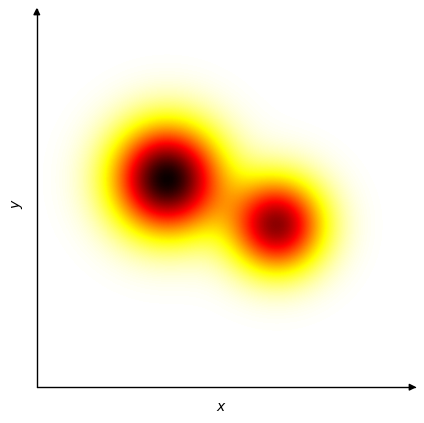

In [7]:
plt.figure().add_subplot(axes_class=AxesZero)
plt.imshow(Z[::-1], cmap='hot_r', interpolation='bilinear', extent=(-2,2,-2,2))
plt.xticks([])
plt.yticks([])
plt.ylabel('$y$')
plt.xlabel('$x$')
plt.gca().axis["left"].set_axisline_style("-|>")
plt.gca().axis["bottom"].set_axisline_style("-|>")
plt.gca().axis["top"].set_visible(False)
plt.gca().axis["right"].set_visible(False)
plt.savefig('fluence_continuous_2D.pdf', bbox_inches='tight')
plt.show()

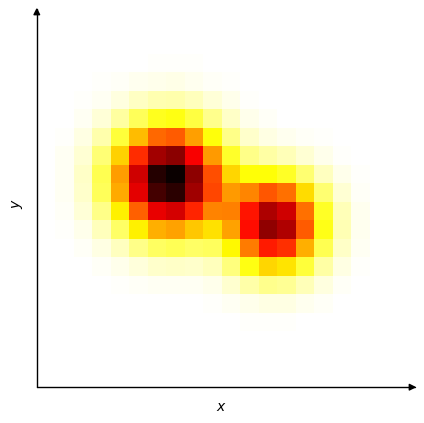

In [8]:
plt.figure().add_subplot(axes_class=AxesZero)
plt.imshow(B[::-1], cmap='hot_r', interpolation='none', extent=(-2,2,-2,2))
plt.xticks([])
plt.yticks([])
plt.ylabel('$y$')
plt.xlabel('$x$')
plt.gca().axis["left"].set_axisline_style("-|>")
plt.gca().axis["bottom"].set_axisline_style("-|>")
plt.gca().axis["top"].set_visible(False)
plt.gca().axis["right"].set_visible(False)
plt.savefig('fluence_discrete_2D.pdf', bbox_inches='tight')
plt.show()

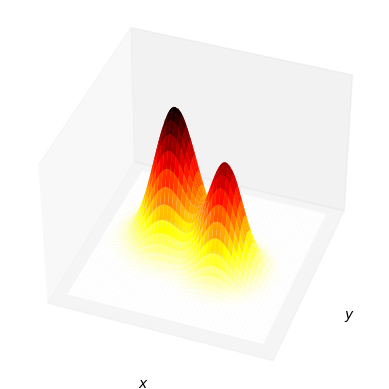

In [9]:
plt.figure().add_subplot(1,1,1, projection='3d')
plt.gca().plot_surface(X, Y, Z, cmap='hot_r')
plt.gca().xaxis.line.set_color((0.0, 0.0, 0.0, 0.0))
plt.xticks([])
plt.xlabel('$x$')
plt.gca().yaxis.line.set_color((0.0, 0.0, 0.0, 0.0))
plt.yticks([])
plt.ylabel('$y$')
plt.gca().set_zlabel('') # ('fluence')
plt.gca().zaxis.line.set_color((0.0, 0.0, 0.0, 0.0))
plt.gca().set_zticks([])
plt.gca().view_init(40, 290)
plt.savefig('fluence_continuous_3D.pdf', bbox_inches='tight')
plt.show()

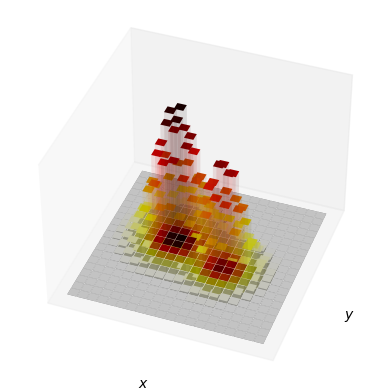

In [10]:
plt.figure().add_subplot(1,1,1, projection='3d')
for i in range(B.shape[0]):
    for j in range(B.shape[1]):
        t = (0,0,0,0)
        c = get_color(B[i,j])
        ca = get_color_alpha(B[i,j])
        cs = (c,c,ca,t,t,ca) # (-Z, +Z, -Y, +Y, -X, +X)
        plt.gca().bar3d(BX[i,j], BY[i,j], 0, 4/len(BX), 4/len(BX[0]), B[i,j], color=cs)
plt.gca().xaxis.line.set_color((0.0, 0.0, 0.0, 0.0))
plt.xticks([])
plt.xlabel('$x$')
plt.gca().yaxis.line.set_color((0.0, 0.0, 0.0, 0.0))
plt.yticks([])
plt.ylabel('$y$')
plt.gca().set_zlabel('') # ('fluence')
plt.gca().zaxis.line.set_color((0.0, 0.0, 0.0, 0.0))
plt.gca().set_zticks([])
plt.gca().view_init(40, 290)
plt.savefig('fluence_discrete_3D.pdf', bbox_inches='tight')
plt.show()